In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
import numpy as np

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv(r'C:\Users\tyagir01\Desktop\JetRail_train.csv', index_col = 'Date_time' )
df.head()

,ID,Count
Date_time,,
25-08-2012 00:00,0,8
25-08-2012 01:00,1,2
25-08-2012 02:00,2,6
25-08-2012 03:00,3,2
25-08-2012 04:00,4,2


In [6]:
#Aggregating the dataset at daily level
df.index = pd.to_datetime(df.index,format='%d-%m-%Y %H:%M')  

In [20]:
df.head()

,ID,Count
Date_time,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2


In [8]:
df.tail()

,ID,Count
Date_time,,
2014-09-25 19:00:00,18283,868
2014-09-25 20:00:00,18284,732
2014-09-25 21:00:00,18285,702
2014-09-25 22:00:00,18286,580
2014-09-25 23:00:00,18287,534


In [9]:
# Splitting the Data
train = df[0:14640]
test = df[14640:]

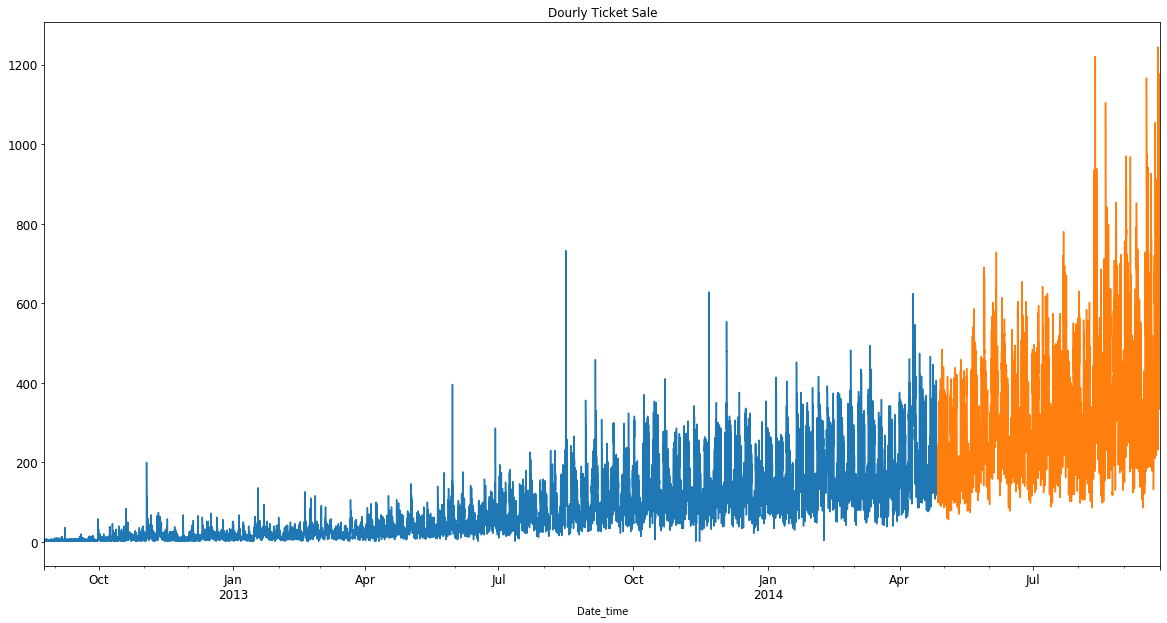

In [11]:
#Plotting data
train.Count.plot(figsize=(20,10), title = 'Hourly Ticket Sale', fontsize=12)
test.Count.plot(figsize=(20,10), title = 'Dourly Ticket Sale', fontsize=12)
plt.show()

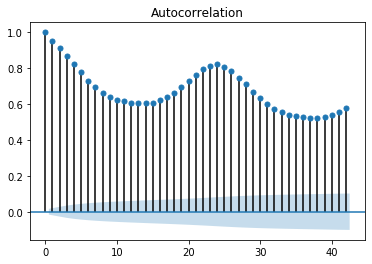

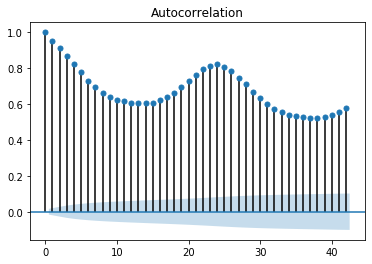

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train.Count)

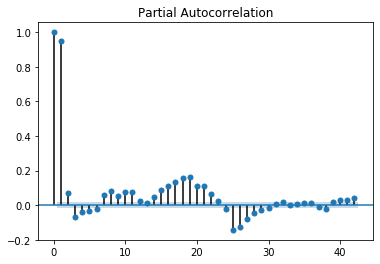

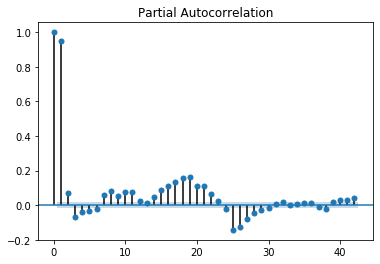

In [31]:
plot_pacf(train.Count)

In [13]:
train_diff = train.Count.diff(periods=1)
train_diff = train_diff[1:]
train_diff.head()

Date_time
2012-08-25 01:00:00   -6.0
2012-08-25 02:00:00    4.0
2012-08-25 03:00:00   -4.0
2012-08-25 04:00:00    0.0
2012-08-25 05:00:00    0.0
Name: Count, dtype: float64

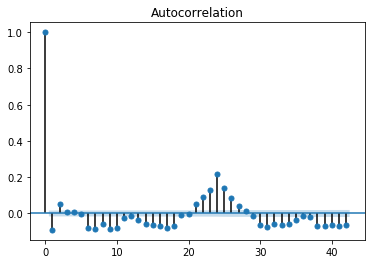

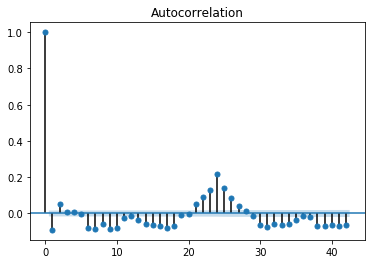

In [14]:
plot_acf(train_diff)

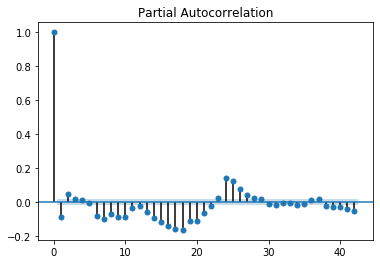

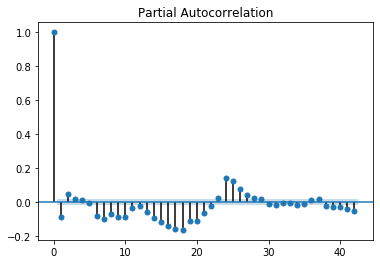

In [32]:
plot_pacf(train_diff)

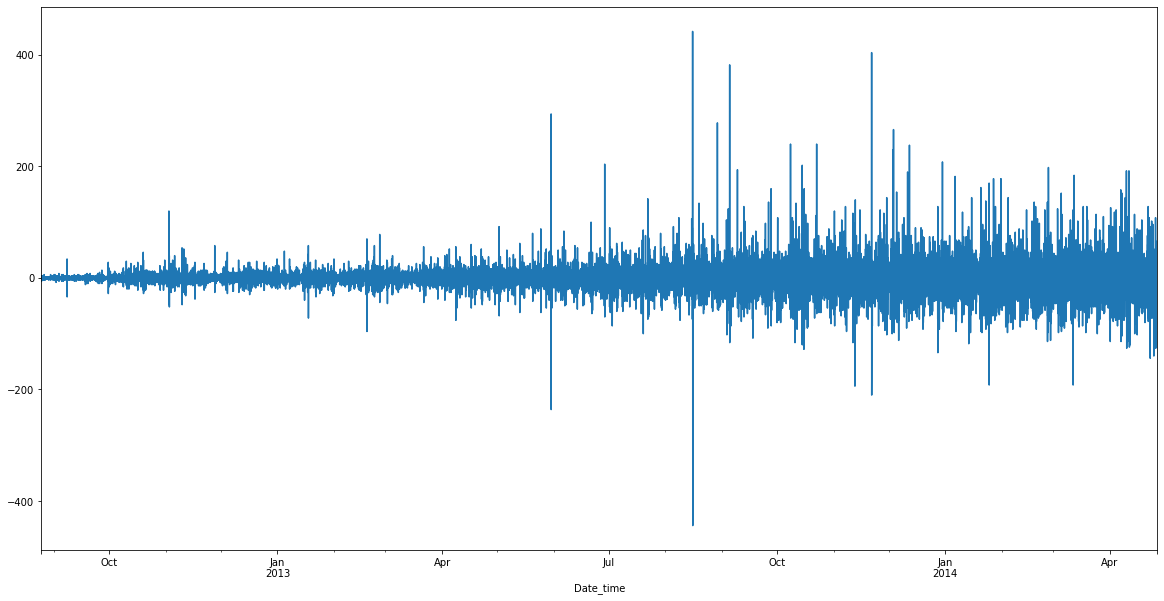

In [15]:
plt.figure(figsize=(20,10))
train_diff.plot()

In [17]:
test.drop(columns='ID', inplace=True)
test.head()

C:\Users\tyagir01\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Count
Date_time,
2014-04-27 00:00:00,202
2014-04-27 01:00:00,154
2014-04-27 02:00:00,100
2014-04-27 03:00:00,244
2014-04-27 04:00:00,130


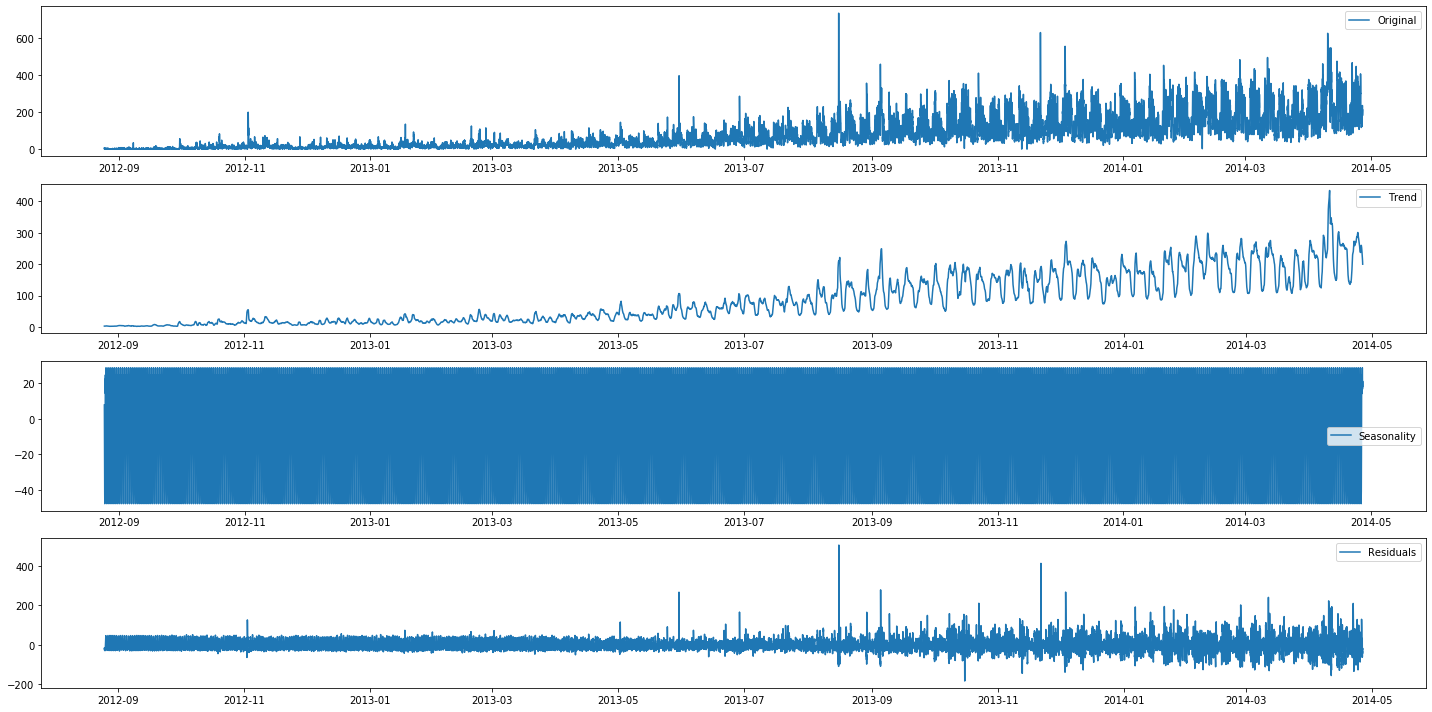

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train.Count)

trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(train.Count, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonality, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residuals, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

In [29]:
def test_stationarity(timeseries):
    
    # Determining Rolling Statistics
    movingAverage = timeseries.rolling(window=30).mean()
    movingSTD = timeseries.rolling(window=30).mean()
    
    # Plot Rolling Statistics
    plt.figure(figsize=(20,10))
    orig = plt.plot(timeseries, color='blue', label = 'Original')
    mean = plt.plot(movingAverage, color='red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color='yellow', label = 'Rolling Std Deviation')
    plt.legend(loc='best')
    plt.show(block=False)
    
    # Perform Dicky-Fuller Test
    print('Results of Dicky-Fuller Test:')
    df_test = adfuller(timeseries, autolag ='AIC')
    df_output  = pd.Series(df_test[0:4], index = ['Test Statistic','P-value','# Lags-Used','# Observations Used'])
    for key,value in df_test[4].items():
        df_output['Critical Values (%s)' %key] = value
    print(df_output)

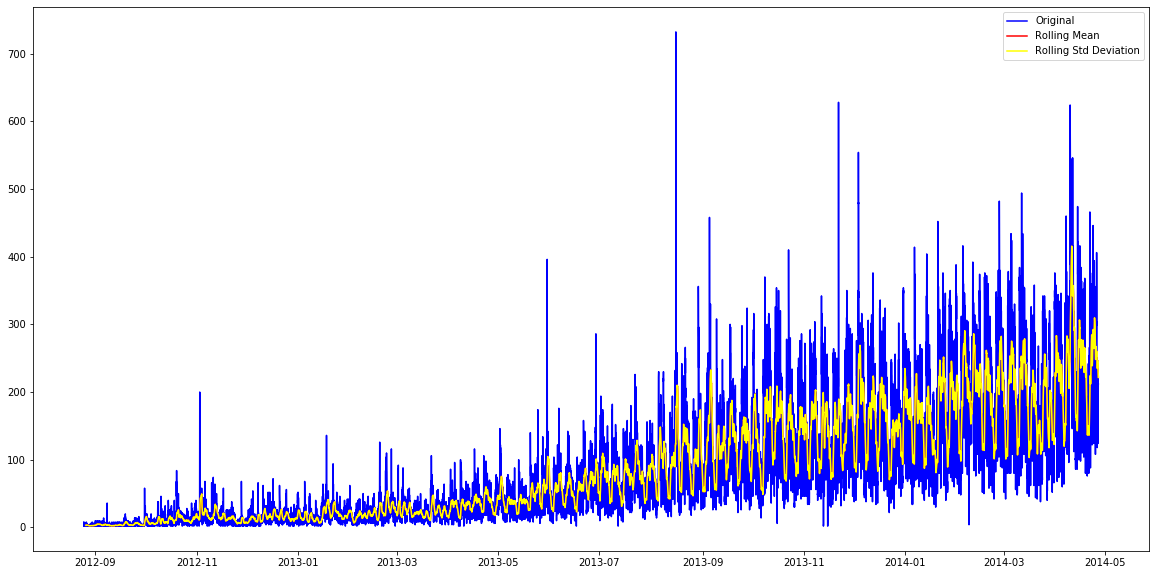

Results of Dicky-Fuller Test:
Test Statistic          -5.713313e+00
P-value                  7.215716e-07
# Lags-Used              4.200000e+01
# Observations Used      1.459700e+04
Critical Values (1%)    -3.430798e+00
Critical Values (5%)    -2.861738e+00
Critical Values (10%)   -2.566875e+00
dtype: float64


In [30]:
test_stationarity(train.Count)

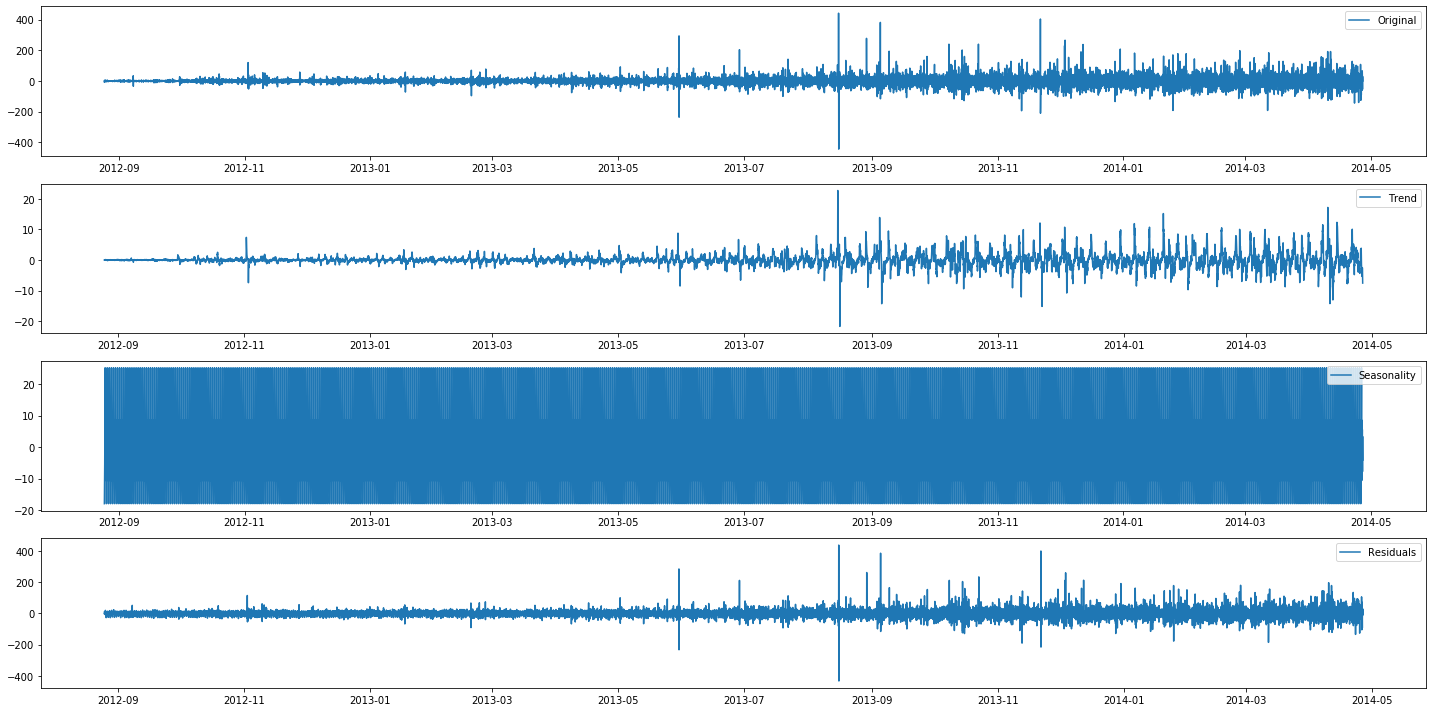

In [33]:
decomposition_diff = seasonal_decompose(train_diff)

trend_diff = decomposition_diff.trend
seasonality_diff = decomposition_diff.seasonal
residuals_diff = decomposition_diff.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(train_diff, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend_diff, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonality_diff, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residuals_diff, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

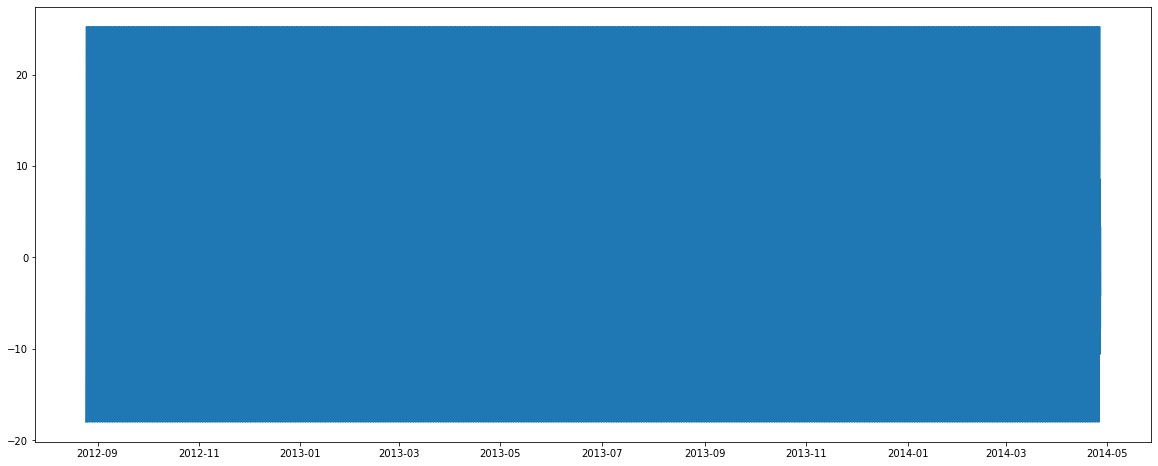

In [39]:
plt.figure(figsize=(20,8))
plt.plot(seasonality_diff)

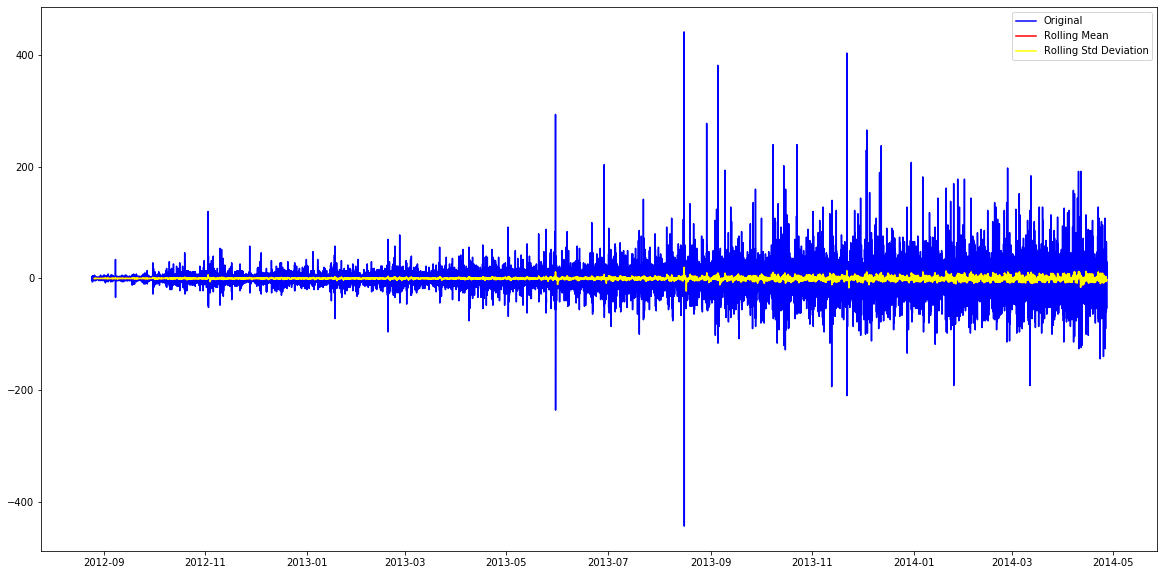

Results of Dicky-Fuller Test:
Test Statistic             -25.118617
P-value                      0.000000
# Lags-Used                 42.000000
# Observations Used      14596.000000
Critical Values (1%)        -3.430798
Critical Values (5%)        -2.861738
Critical Values (10%)       -2.566875
dtype: float64


In [40]:
test_stationarity(train_diff)

In [46]:
test.tail()

,Count
Date_time,
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702
2014-09-25 22:00:00,580
2014-09-25 23:00:00,534


In [41]:
### ARIMA Model Building

In [68]:
model_arima = sm.tsa.statespace.SARIMAX(train.Count, order = (2,1,2), seasonal_order=(0,1,1,7)).fit()
y_hat_avg = test.copy()
y_hat_avg['predictions'] = model_arima.predict(start="2014-04-27 00:00:00", end= "2014-09-25 23:00:00" , dynamic = True)

C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


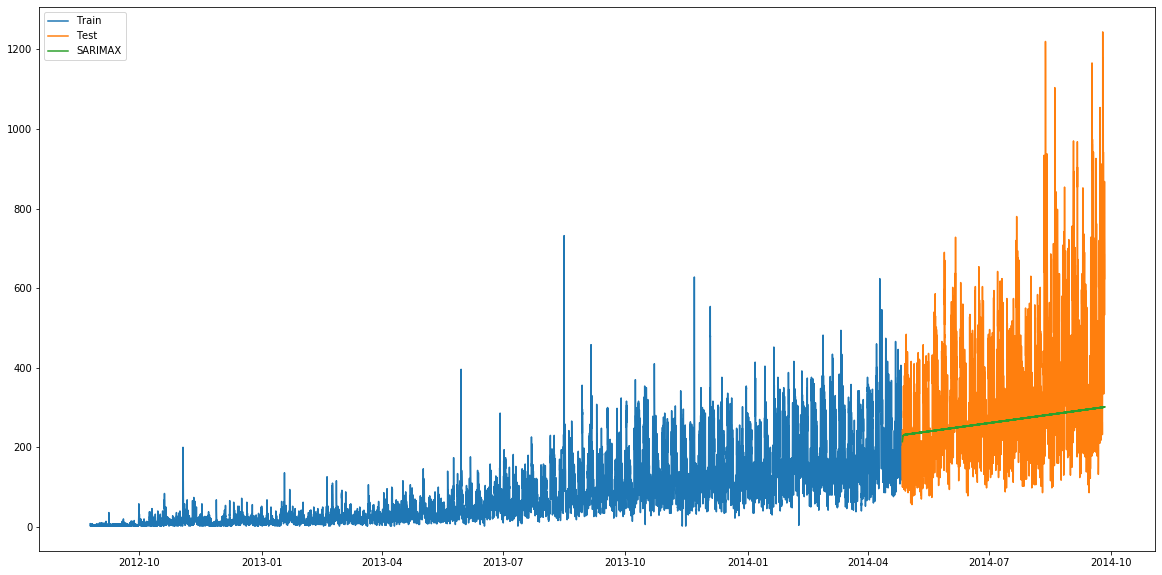

In [65]:
plt.figure(figsize=(20,10))
plt.plot( train.Count, label='Train')
plt.plot(test.Count, label='Test')
plt.plot(y_hat_avg['predictions'], label='SARIMAX')
plt.legend(loc='best')
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test.Count, y_hat_avg.predictions))
print(rmse)

217.8060559327645


In [54]:
y_hat_avg.head()

,Count,predictions
Date_time,,
2014-04-27 00:00:00,202,214.341315
2014-04-27 01:00:00,154,217.564078
2014-04-27 02:00:00,100,218.894573
2014-04-27 03:00:00,244,221.939064
2014-04-27 04:00:00,130,221.985327


In [56]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Count   No. Observations:                14640
Model:             SARIMAX(2, 1, 4)x(0, 1, [1], 7)   Log Likelihood              -68989.260
Date:                             Fri, 24 Jul 2020   AIC                         137994.520
Time:                                     16:45:25   BIC                         138055.247
Sample:                                 08-25-2012   HQIC                        138014.693
                                      - 04-26-2014                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0851      0.054     -1.567      0.117      -0.192       0.021
ar.L2          0.8091      0.047     17.232      0.000       0.717       0.901
ma.L1         -0.0742      0.054     -1.368      0.171      -0.180       0.032
ma.L2         -0.8357      0.055    -15.063      0.000      -0.944      -0.727
ma.L3          0.0168      0.007      2.283      0.022       0.002       0.031
ma.L4         -0.1031      0.006    -16.469      0.000      -0.115      -0.091
ma.S.L7       -0.9995      0.001  -1373.713      0.000      -1.001      -0.998
sigma2       724.9715      2.474    293.095      0.000     720.124     729.820
===================================================================================
Ljung-Box (Q):                     3023.03   Jarque-Bera (JB):            403059.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              20.44   Skew:                             1.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

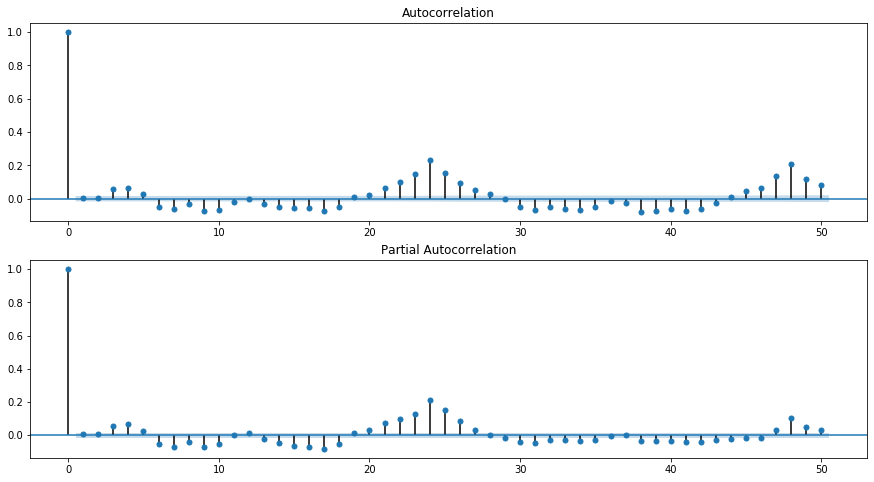

In [61]:
res = model_arima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [71]:
### Holt Winters method
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [72]:
model_hw = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = model_hw.forecast(len(test))

C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


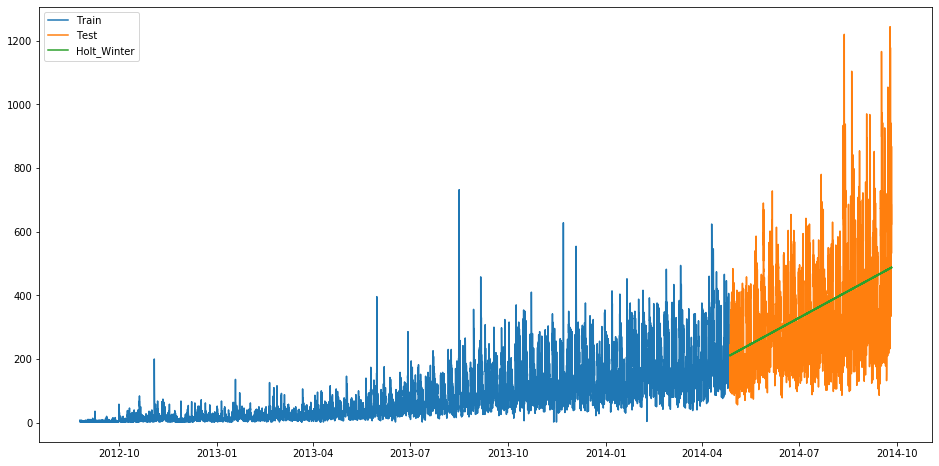

In [73]:
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [74]:
rmse_HW = np.sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_Winter))
print(rmse_HW)

158.89519064458153


In [75]:
train_copy = train.copy()

In [79]:
train_copy.tail()

,ID,Count
Date_time,,
2014-04-26 19:00:00,14635,230
2014-04-26 20:00:00,14636,236
2014-04-26 21:00:00,14637,182
2014-04-26 22:00:00,14638,212
2014-04-26 23:00:00,14639,212


In [91]:
train_copy['predictions'] = model_arima.predict(start="2012-08-25 00:00:00", end= "2014-04-26 23:00:00" , dynamic = True)

In [92]:
rmse_train_Sarimax = np.sqrt(mean_squared_error(train.Count, train_copy.predictions))
print(rmse_train_Sarimax)

125.06474170399241


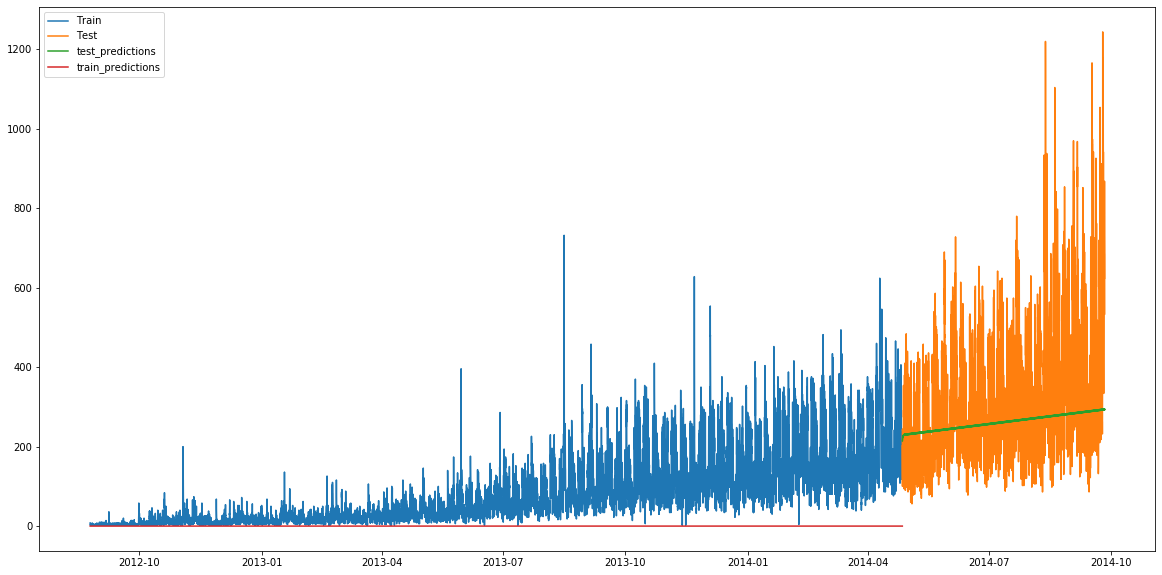

In [93]:
plt.figure(figsize=(20,10))
plt.plot( train.Count, label='Train')
plt.plot(test.Count, label='Test')
plt.plot(y_hat_avg['predictions'], label='test_predictions')
plt.plot(train_copy.SARIMAX, label='train_predictions')
plt.legend(loc='best')
plt.show()

In [86]:
train_copy.tail()

,ID,Count,SARIMAX
Date_time,,,
2014-04-26 19:00:00,14635,230,0.0
2014-04-26 20:00:00,14636,236,0.0
2014-04-26 21:00:00,14637,182,0.0
2014-04-26 22:00:00,14638,212,0.0
2014-04-26 23:00:00,14639,212,0.0


In [89]:
train.drop(columns=['SARIMAX','ID'], inplace=True)

C:\Users\tyagir01\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [90]:
train.head()

,Count
Date_time,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
